In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/blood_count_dataset.csv')

In [2]:
data.head()
data.info()

NameError: name 'data' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


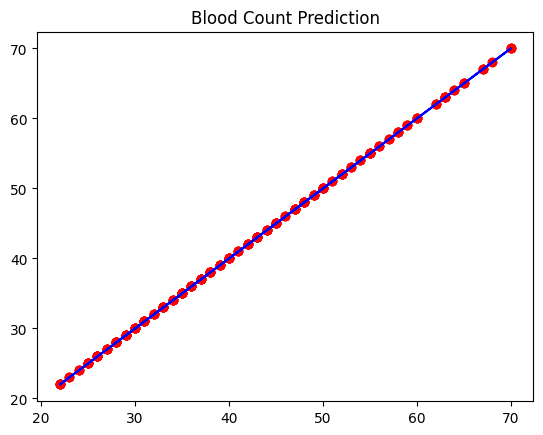

In [ ]:
x=data.iloc[:,:1].values
y=data.iloc[:,:1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#print(y_pred)
#print(y_test)
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('Blood Count Prediction')
#plt.xlabel('')
#plt.ylabel('')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


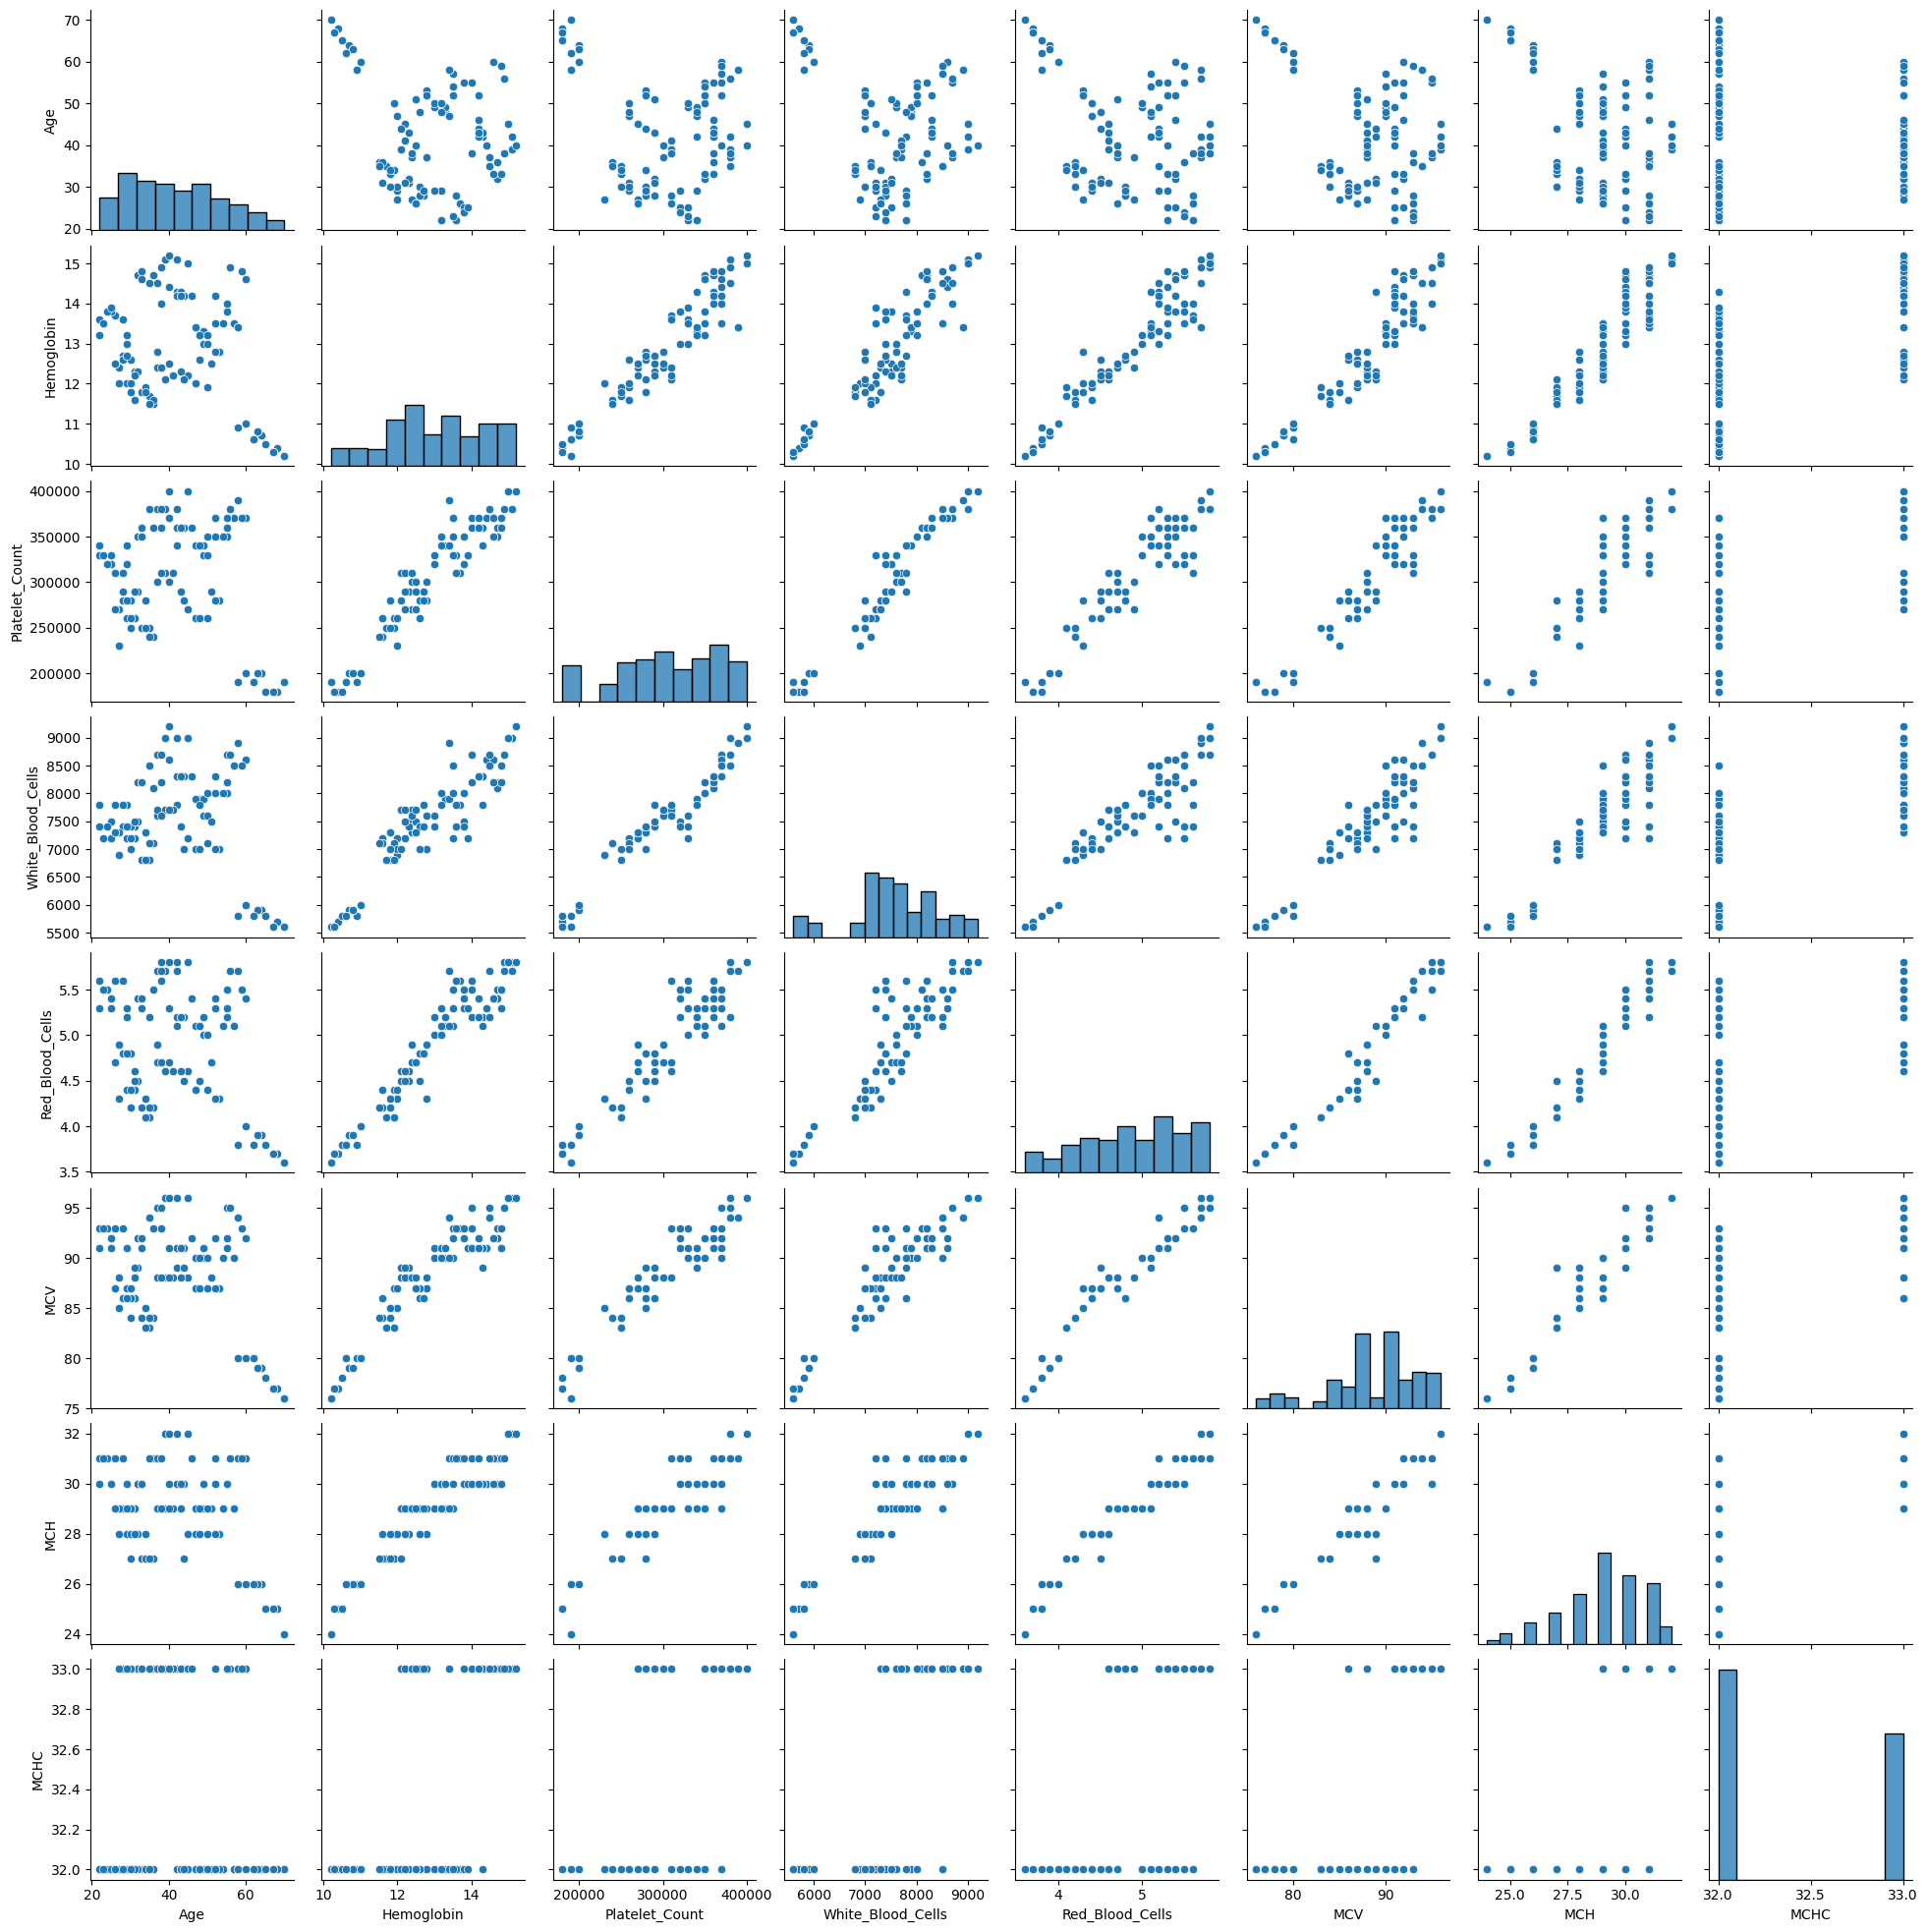

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the file is in your Google Drive, you need to mount your Drive first:
from google.colab import drive
drive.mount('/content/drive')

# Update the path to include your Drive's folder structure
# Replace 'My Drive/Data' with the actual path to your file within your Drive
file_path = '/content/drive/My Drive/Data/blood_count_dataset.csv'

df = pd.read_csv('/content/blood_count_dataset.csv')
sns.pairplot(df)
plt.show()

In [ ]:
!pip install scikeras

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                417 non-null    int64  
 1   Gender             417 non-null    object 
 2   Hemoglobin         417 non-null    float64
 3   Platelet_Count     417 non-null    int64  
 4   White_Blood_Cells  417 non-null    int64  
 5   Red_Blood_Cells    417 non-null    float64
 6   MCV                417 non-null    int64  
 7   MCH                417 non-null    int64  
 8   MCHC               417 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.4+ KB


In [ ]:
x=df.iloc[:,1].values
y=df.iloc[:,0].values
x=pd.get_dummies(x,drop_first=True)
x.head()

,Male
0,False
1,True
2,True
3,False
4,True


In [ ]:
x_train,x_tes,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (333, 1)
x_test: (84, 1)
y_train: (333,)
y_test: (84,)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor

df = pd.read_csv('/content/blood_count_dataset.csv')
df.head()

features = ['Age', 'Gender']
# Corrected the column names in the 'targets' list
targets = ['Hemoglobin', 'Platelets', 'WBC', 'RBC', 'MCV', 'MCH', 'MCHC']

x = df[features]
y = df[targets]
x = pd.get_dummies(x, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Convert x_train and x_test to int64
x_train = x_train.astype(np.int64)
x_test = x_test.astype(np.int64)

def build_model():
    model = Sequential()
    model.add(Dense(64, kernel_initializer='uniform', activation='relu', input_dim=x_train.shape[1]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(len(targets), kernel_initializer='uniform'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor

# Define the model-building function
def build_model():
    model = Sequential()
    model.add(Dense(64, kernel_initializer='uniform', activation='relu', input_dim=x_train.shape[1]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(len(targets), kernel_initializer='uniform'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Create KerasRegressor
model = KerasRegressor(model=build_model, batch_size=15, epochs=100)

# Train the model
model.fit(x_train, y_train)

# Save the underlying Keras model in H5 format
model.model_.save('C:/Users/USER/Downloads/patientprediction/blood_count_data_model.h5')

# Make predictions
y_pred = model.predict(x_test)

# Optionally, you can print or log the predictions
print("Predictions:", y_pred)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

age = float(input("Enter your age: "))
gender = input("Enter your gender (male/female): ")
new_data = pd.DataFrame({
    'Age': [age],
    'Gender': [gender]
})
new_data = pd.get_dummies(new_data, drop_first=True)
missing_cols = set(x_train.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0
new_data = new_data[x_train.columns]

# Convert 'Age' column in new_data to int64 to match the model's input type
new_data['Age'] = new_data['Age'].astype(np.int64)

prediction = model.predict(new_data)
print("Predicted Hemoglobin:", prediction[0][0])
print("Predicted Platelet Count:", prediction[0][1])
print("Predicted White Blood Cells:", prediction[0][2])
print("Predicted Red Blood Cells:", prediction[0][3])
print("Predicted MCV:", prediction[0][4])
print("Predicted MCH:", prediction[0][5])
print("Predicted MCHC:", prediction[0][6])

x_train shape: (333, 2)
x_test shape: (84, 2)
y_train shape: (333, 7)
y_test shape: (84, 7)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 13709033472.0000 - mae: 44515.7734
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13612656640.0000 - mae: 44370.1875 
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14240931840.0000 - mae: 45353.3359 
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14067776512.0000 - mae: 45174.1289 
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14069046272.0000 - mae: 45055.5117 
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13686779904.0000 - mae: 44167.3867 
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13335530496.0000 - mae: 43369.3242 
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13061728256.0000 - mae: 42680.7695 
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12337373184.0000 - mae: 41756.0586 
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11607483392.0000 - mae: 40694.3789
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predictions: [[-3.86351433e+01  3.64215344e+05  9.05541113e+03 -1.13403392e+00
   1.05687721e+02 -8.09237194e+00 -6.62898302e+00]
 [-3.14899616e+01  2.97111094e+05  7.38714160e+03 -9.10185456e-01
   8.63009567e+01 -6.55453682e+00 -5.35537386e+00]
 [-2.71575813e+01  2.56423469e+05  6.37561230e+03 -7.74459481e-01
   7.45460968e+01 -5.62209940e+00 -4.58314514e+00]
 [-3.91416740e+01  3.68972344e+05  9.17367383e+03 -1.14990258e+00
   1.07062042e+02 -8.20138741e+00 -6.71926594e+00]
 [-3.59534607e+01  3.39030219e+05  8.42928613e+03 -1.05002010e+00
   9.84115982e+01 -7.51519871e+00 -6.15097666e+00]
 [-3.99104347e+01  3.76192219e+05  9.35316602e+03 -1.17398667e+00
   1.09147896e+02 -8.36684704e+00 -6.85629940e+00]
 [-2.07811604e+01  1.96539109e+05  4.88683594e+03 -5.74695706e-01
   5.72452049e+01 -4.24972439e+00 -3.44656754e+00]
 [-3.35340080e+01  3.16307844e+05  7.86438965e+03 -9.74223852e-01
   9.18469925e+01 -6.99447536e+00 -5.71972322e+00]
 [-2.63888168

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor
import pickle  # Import pickle for saving other objects

# Load your dataset
df = pd.read_csv('/content/blood_count_dataset.csv')

# Define features and targets
features = ['Age', 'Gender']
targets = ['Hemoglobin', 'Platelets', 'WBC', 'RBC', 'MCV', 'MCH', 'MCHC']

x = df[features]
y = df[targets]
x = pd.get_dummies(x, drop_first=True)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert x_train and x_test to int64
x_train = x_train.astype(np.int64)
x_test = x_test.astype(np.int64)

# Build the model
def build_model():
    model = Sequential()
    model.add(Dense(64, kernel_initializer='uniform', activation='relu', input_dim=x_train.shape[1]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(len(targets), kernel_initializer='uniform'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Create KerasRegressor
model = KerasRegressor(model=build_model, batch_size=15, epochs=100)

# Train the model
model.fit(x_train, y_train)

# Save the underlying Keras model in H5 format
model.model_.save('C:/Users/USER/Downloads/patientprediction/blood_count_data_model.h5')

# Save training data and model details using pickle
with open('C:/Users/USER/Downloads/patientprediction/training_data.pkl', 'wb') as f:
    pickle.dump((x_train, y_train), f)

# Make predictions
y_pred = model.predict(x_test)

# Print predictions
print("Predictions:", y_pred)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# User input for prediction
age = float(input("Enter your age: "))
gender = input("Enter your gender (male/female): ")
new_data = pd.DataFrame({
    'Age': [age],
    'Gender': [gender]
})
new_data = pd.get_dummies(new_data, drop_first=True)
missing_cols = set(x_train.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0
new_data = new_data[x_train.columns]

# Convert 'Age' column in new_data to int64 to match the model's input type
new_data['Age'] = new_data['Age'].astype(np.int64)

# Make predictions on new data
prediction = model.predict(new_data)
print("Predicted Hemoglobin:", prediction[0][0])
print("Predicted Platelet Count:", prediction[0][1])
print("Predicted White Blood Cells:", prediction[0][2])
print("Predicted Red Blood Cells:", prediction[0][3])
print("Predicted MCV:", prediction[0][4])
print("Predicted MCH:", prediction[0][5])
print("Predicted MCHC:", prediction[0][6])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 14151583744.0000 - mae: 45213.5547 
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14105084928.0000 - mae: 45206.6250 
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14143401984.0000 - mae: 45286.9570 
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13935907840.0000 - mae: 44870.3945 
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13598203904.0000 - mae: 44307.6797 
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13457230848.0000 - mae: 43858.2109 
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13403696128.0000 - mae: 43489.7070 
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12847840256.0000 - mae: 42343.1406 
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12485357568.0000 - mae: 41849.9805  
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11259429888.0000 - mae: 39967.5664 
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predictions: [[-1.99816208e+01  3.57924531e+05  9.27650977e+03 -2.39838333e+01
   1.54499359e+02  5.75060616e+01  6.47584229e+01]
 [-1.62559185e+01  2.91634531e+05  7.55857129e+03 -1.95266228e+01
   1.25972710e+02  4.69087753e+01  5.28170242e+01]
 [-1.40291424e+01  2.52014734e+05  6.53180322e+03 -1.68626518e+01
   1.08923073e+02  4.05750427e+01  4.56799583e+01]
 [-2.02242355e+01  3.62241062e+05  9.38837500e+03 -2.42740726e+01
   1.56356888e+02  5.81961174e+01  6.55360031e+01]
 [-1.85707607e+01  3.32821656e+05  8.62595801e+03 -2.22959652e+01
   1.43696808e+02  5.34930611e+01  6.02364311e+01]
 [-2.06430092e+01  3.69692250e+05  9.58147656e+03 -2.47750797e+01
   1.59563370e+02  5.93872833e+01  6.68782425e+01]
 [-1.07222099e+01  1.93175938e+05  5.00696631e+03 -1.29064350e+01
   8.36029129e+01  3.11689186e+01  3.50808105e+01]
 [-1.73360729e+01  3.10853469e+05  8.05664014e+03 -2.08188629e+01
   1.34243225e+02  4.99811592e+01  5.62790985e+01]
 [-1.36103745

In [ ]:
def analyze_health(predicted_values):
    # Extract predicted values
    hemoglobin = predicted_values['hemoglobin']
    platelet_count = predicted_values['platelet_count']
    white_blood_cells = predicted_values['white_blood_cells']
    red_blood_cells = predicted_values['red_blood_cells']
    mcv = predicted_values['mcv']
    mch = predicted_values['mch']
    mchc = predicted_values['mchc']

    # Initialize health status and severity
    health_status = "Healthy"
    severity = 0
    suggestions = []

    # Analyze each parameter based on common medical standards
    if hemoglobin < 12 or hemoglobin > 16:  # Example range for females
        health_status = "Unhealthy"
        severity += 2  # Increase severity
        suggestions.append("Consult a doctor regarding hemoglobin levels.")

    if platelet_count < 150000 or platelet_count > 450000:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Monitor your platelet count and consult a healthcare provider.")

    if white_blood_cells < 4000 or white_blood_cells > 10000:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Consider lifestyle changes to boost immune health.")

    if red_blood_cells < 4.0 or red_blood_cells > 5.5:  # Example range for females
        health_status = "Unhealthy"
        severity += 2
        suggestions.append("Discuss your RBC levels with a healthcare professional.")

    if mcv < 80 or mcv > 100:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Consider dietary changes or supplements.")

    if mch < 27 or mch > 32:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Consult a healthcare provider regarding MCH levels.")

    if mchc < 32 or mchc > 36:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Monitor MCHC levels and consider dietary adjustments.")

    # Map severity to a scale of 1 to 5
    severity = min(severity, 5)

    # Output results
    return {
        'health_status': health_status,
        'severity': severity,
        'suggestions': suggestions
    }

# Example predicted values
predicted_values = {
    'hemoglobin': 32.49608,
    'platelet_count': 429036.2,
    'white_blood_cells': 10337.558,
    'red_blood_cells': -9.799953,
    'mcv': 182.14523,
    'mch': 38.30445,
    'mchc': 42.964577
}

# Analyze the health status
health_analysis = analyze_health(predicted_values)

# Display results
print(f"Health Status: {health_analysis['health_status']}")
print(f"Severity (out of 5): {health_analysis['severity']}")
print("Suggestions for Improvement:")
for suggestion in health_analysis['suggestions']:
    print(f"- {suggestion}")


Health Status: Unhealthy
Severity (out of 5): 5
Suggestions for Improvement:
- Consult a doctor regarding hemoglobin levels.
- Consider lifestyle changes to boost immune health.
- Discuss your RBC levels with a healthcare professional.
- Consider dietary changes or supplements.
- Consult a healthcare provider regarding MCH levels.
- Monitor MCHC levels and consider dietary adjustments.


user input prediction

In [ ]:
def analyze_health(predicted_values):
    # Extract predicted values
    hemoglobin = predicted_values['hemoglobin']
    platelet_count = predicted_values['platelet_count']
    white_blood_cells = predicted_values['white_blood_cells']
    red_blood_cells = predicted_values['red_blood_cells']
    mcv = predicted_values['mcv']
    mch = predicted_values['mch']
    mchc = predicted_values['mchc']

    # Initialize health status and severity
    health_status = "Healthy"
    severity = 0
    suggestions = []

    # Analyze each parameter based on common medical standards
    if hemoglobin < 12 or hemoglobin > 16:  # Example range for females
        health_status = "Unhealthy"
        severity += 2
        suggestions.append("Consult a doctor regarding hemoglobin levels.")

    if platelet_count < 150000 or platelet_count > 450000:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Monitor your platelet count and consult a healthcare provider.")

    if white_blood_cells < 4000 or white_blood_cells > 10000:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Consider lifestyle changes to boost immune health.")

    if red_blood_cells < 4.0 or red_blood_cells > 5.5:  # Example range for females
        health_status = "Unhealthy"
        severity += 2
        suggestions.append("Discuss your RBC levels with a healthcare professional.")

    if mcv < 80 or mcv > 100:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Consider dietary changes or supplements.")

    if mch < 27 or mch > 32:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Consult a healthcare provider regarding MCH levels.")

    if mchc < 32 or mchc > 36:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Monitor MCHC levels and consider dietary adjustments.")

    # Map severity to a scale of 1 to 5
    severity = min(severity, 5)

    # Output results
    return {
        'health_status': health_status,
        'severity': severity,
        'suggestions': suggestions
    }

# Get user input for predicted values
predicted_values = {
    'hemoglobin': float(input("Enter predicted Hemoglobin: ")),
    'platelet_count': float(input("Enter predicted Platelet Count: ")),
    'white_blood_cells': float(input("Enter predicted White Blood Cells: ")),
    'red_blood_cells': float(input("Enter predicted Red Blood Cells: ")),
    'mcv': float(input("Enter predicted MCV: ")),
    'mch': float(input("Enter predicted MCH: ")),
    'mchc': float(input("Enter predicted MCHC: "))
}

# Analyze the health status
health_analysis = analyze_health(predicted_values)

# Display results
print(f"\nHealth Status: {health_analysis['health_status']}")
print(f"Severity (out of 5): {health_analysis['severity']}")
print("Suggestions for Improvement:")
for suggestion in health_analysis['suggestions']:
    print(f"- {suggestion}")


Enter predicted Hemoglobin: 17
Enter predicted Platelet Count: 370000
Enter predicted White Blood Cells: 8700
Enter predicted Red Blood Cells: 5.8
Enter predicted MCV: 92
Enter predicted MCH: 31
Enter predicted MCHC: 33

Health Status: Unhealthy
Severity (out of 5): 4
Suggestions for Improvement:
- Consult a doctor regarding hemoglobin levels.
- Discuss your RBC levels with a healthcare professional.


automatic prediction

In [ ]:
def analyze_health(predicted_values):
    # Extract predicted values
    hemoglobin = predicted_values['hemoglobin']
    platelet_count = predicted_values['platelet_count']
    white_blood_cells = predicted_values['white_blood_cells']
    red_blood_cells = predicted_values['red_blood_cells']
    mcv = predicted_values['mcv']
    mch = predicted_values['mch']
    mchc = predicted_values['mchc']

    # Initialize health status and severity
    health_status = "Healthy"
    severity = 0
    suggestions = []

    # Analyze each parameter based on common medical standards
    if hemoglobin < 12 or hemoglobin > 16:  # Example range for females
        health_status = "Unhealthy"
        severity += 2
        suggestions.append("Consult a doctor regarding hemoglobin levels.")

    if platelet_count < 150000 or platelet_count > 450000:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Monitor your platelet count and consult a healthcare provider.")

    if white_blood_cells < 4000 or white_blood_cells > 10000:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Consider lifestyle changes to boost immune health.")

    if red_blood_cells < 4.0 or red_blood_cells > 5.5:  # Example range for females
        health_status = "Unhealthy"
        severity += 2
        suggestions.append("Discuss your RBC levels with a healthcare professional.")

    if mcv < 80 or mcv > 100:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Consider dietary changes or supplements.")

    if mch < 27 or mch > 32:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Consult a healthcare provider regarding MCH levels.")

    if mchc < 32 or mchc > 36:  # Normal range
        health_status = "Unhealthy"
        severity += 1
        suggestions.append("Monitor MCHC levels and consider dietary adjustments.")

    # Map severity to a scale of 1 to 5
    severity = min(severity, 5)

    # Output results
    return {
        'health_status': health_status,
        'severity': severity,
        'suggestions': suggestions
    }

# Predicted values from previous output
predicted_values = {
    'hemoglobin': 32.49608,
    'platelet_count': 429036.2,
    'white_blood_cells': 10337.558,
    'red_blood_cells': -9.799953,
    'mcv': 182.14523,
    'mch': 38.30445,
    'mchc': 42.964577
}

# Analyze the health status
health_analysis = analyze_health(predicted_values)

# Display results
print(f"\nHealth Status: {health_analysis['health_status']}")
print(f"Severity (out of 5): {health_analysis['severity']}")
print("Suggestions for Improvement:")
for suggestion in health_analysis['suggestions']:
    print(f"- {suggestion}")




Health Status: Unhealthy
Severity (out of 5): 5
Suggestions for Improvement:
- Consult a doctor regarding hemoglobin levels.
- Consider lifestyle changes to boost immune health.
- Discuss your RBC levels with a healthcare professional.
- Consider dietary changes or supplements.
- Consult a healthcare provider regarding MCH levels.
- Monitor MCHC levels and consider dietary adjustments.


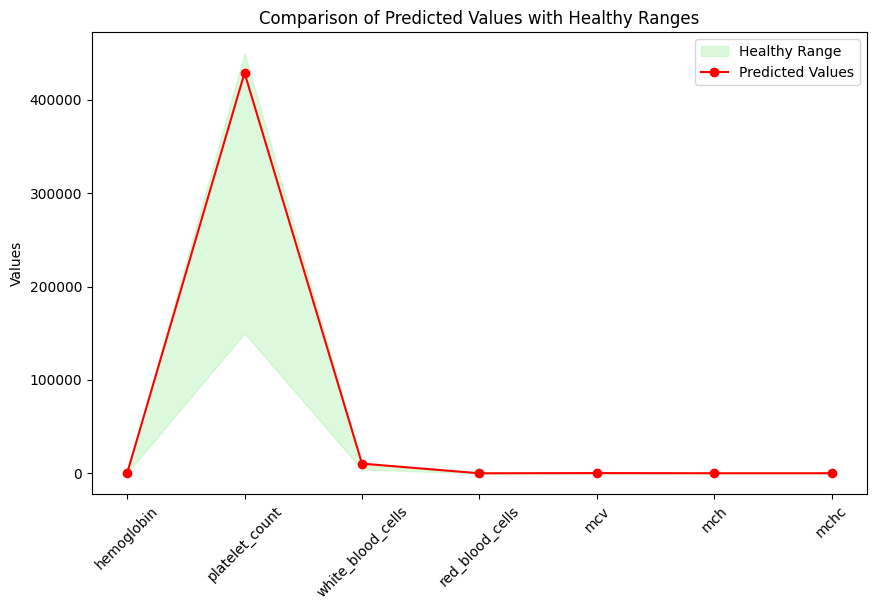

In [ ]:
import matplotlib.pyplot as plt

# Health ranges (for a healthy individual)
health_ranges = {
    'hemoglobin': (12, 16),
    'platelet_count': (150000, 450000),
    'white_blood_cells': (4000, 10000),
    'red_blood_cells': (4.0, 5.5),
    'mcv': (80, 100),
    'mch': (27, 32),
    'mchc': (32, 36)
}

# Predicted values from previous output
predicted_values = {
    'hemoglobin': 32.49608,
    'platelet_count': 429036.2,
    'white_blood_cells': 10337.558,
    'red_blood_cells': -9.799953,
    'mcv': 182.14523,
    'mch': 38.30445,
    'mchc': 42.964577
}

# Prepare data for plotting
parameters = list(health_ranges.keys())
healthy_min = [health_ranges[param][0] for param in parameters]
healthy_max = [health_ranges[param][1] for param in parameters]
predicted = [predicted_values[param] for param in parameters]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(parameters))

# Healthy range (shaded area)
ax.fill_between(x, healthy_min, healthy_max, color="lightgreen", alpha=0.3, label="Healthy Range")

# Predicted values plot
ax.plot(x, predicted, color="red", marker='o', label="Predicted Values")

# Customizing plot
ax.set_xticks(x)
ax.set_xticklabels(parameters, rotation=45)
ax.set_ylabel("Values")
ax.set_title("Comparison of Predicted Values with Healthy Ranges")
ax.legend()

plt.show()


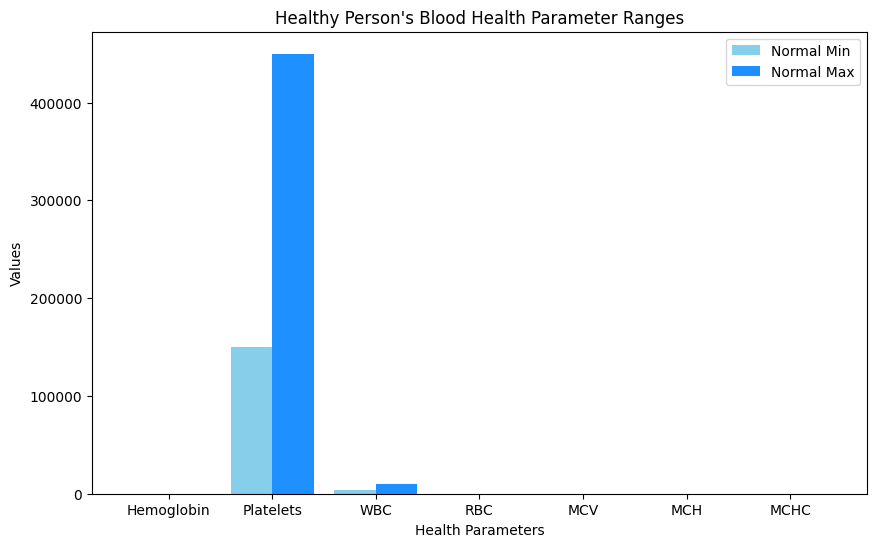

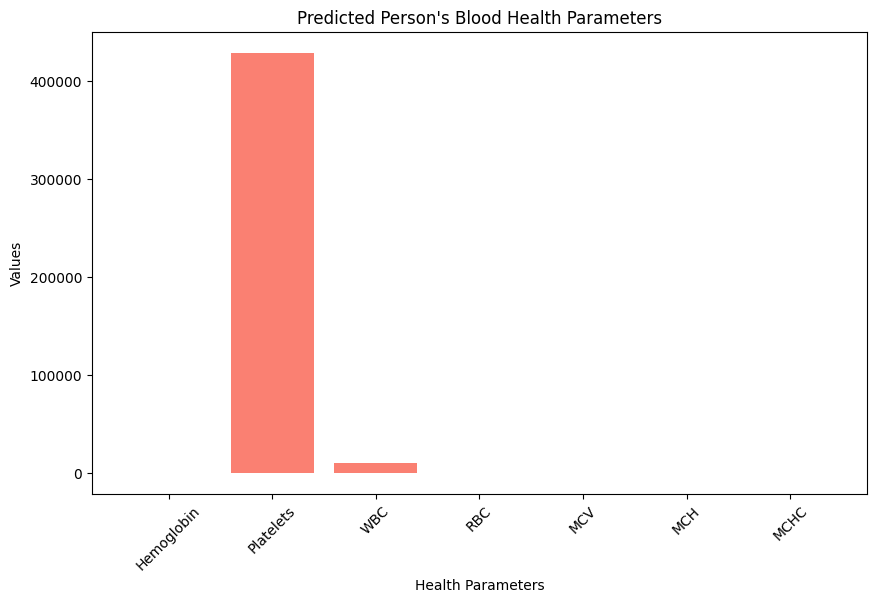

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the normal reference ranges and predicted values (as per the provided code)
parameters = ['Hemoglobin', 'Platelets', 'WBC', 'RBC', 'MCV', 'MCH', 'MCHC']
normal_ranges_min = [12, 150000, 4000, 4., 80, 27, 32]  # Lower bound of normal ranges
normal_ranges_max = [16, 450000, 10000, 5.5, 100, 32, 36] # Upper bound of normal ranges
predicted_values = [32.49608, 429036.2, 10337.558, -9.799953, 182.14523, 38.30445, 42.964577]

# Plot for Healthy Reference Ranges
plt.figure(figsize=(10, 6))
x = np.arange(len(parameters))
plt.bar(x - 0.2, normal_ranges_min, width=0.4, label='Normal Min', color='skyblue')
plt.bar(x + 0.2, normal_ranges_max, width=0.4, label='Normal Max', color='dodgerblue')
plt.xlabel("Health Parameters")
plt.ylabel("Values")
plt.title("Healthy Person's Blood Health Parameter Ranges")
plt.xticks(x, parameters)
plt.legend()
plt.show()

# Plot for Predicted Values
plt.figure(figsize=(10, 6))
plt.bar(parameters, predicted_values, color='salmon')
plt.xlabel("Health Parameters")
plt.ylabel("Values")
plt.title("Predicted Person's Blood Health Parameters")
plt.xticks(rotation=45)
plt.show()

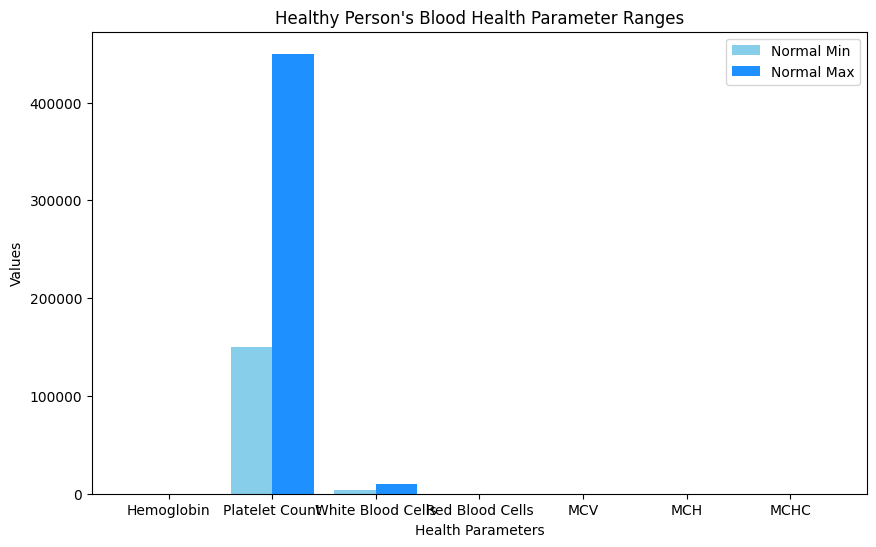

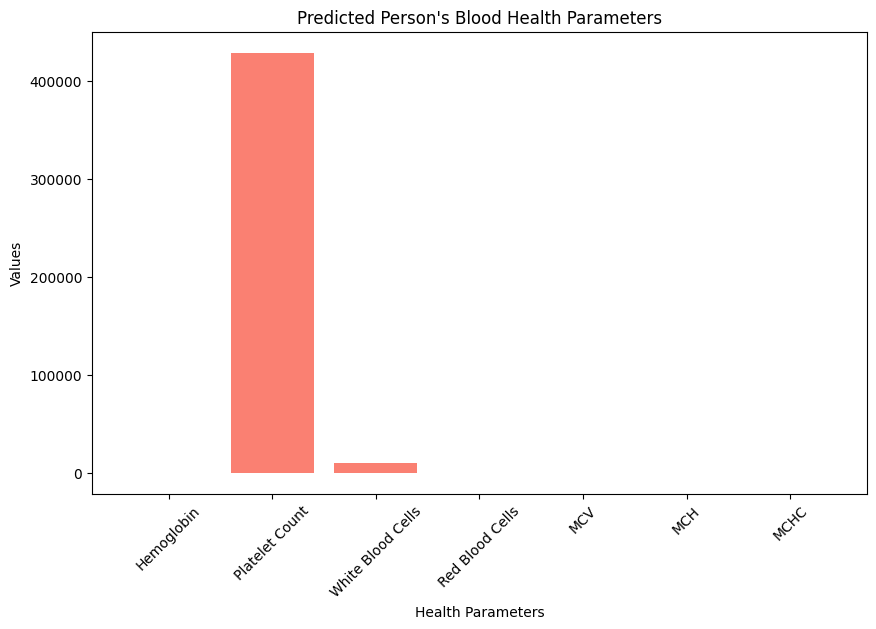

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the normal reference ranges and predicted values (as per the provided code)
parameters = ['Hemoglobin', 'Platelet Count', 'White Blood Cells', 'Red Blood Cells', 'MCV', 'MCH', 'MCHC']
normal_ranges_min = [12, 150000, 4000, 4.0, 80, 27, 32]  # Lower bound of normal ranges
normal_ranges_max = [16, 450000, 10000, 5.5, 100, 32, 36] # Upper bound of normal ranges
predicted_values = [32.49608, 429036.2, 10337.558, -9.799953, 182.14523, 38.30445, 42.964577]

# Plot for Healthy Reference Ranges
plt.figure(figsize=(10, 6))
x = np.arange(len(parameters))
plt.bar(x - 0.2, normal_ranges_min, width=0.4, label='Normal Min', color='skyblue')
plt.bar(x + 0.2, normal_ranges_max, width=0.4, label='Normal Max', color='dodgerblue')
plt.xlabel("Health Parameters")
plt.ylabel("Values")
plt.title("Healthy Person's Blood Health Parameter Ranges")
plt.xticks(x, parameters)
plt.legend()
plt.show()

# Plot for Predicted Values
plt.figure(figsize=(10, 6))
plt.bar(parameters, predicted_values, color='salmon')
plt.xlabel("Health Parameters")
plt.ylabel("Values")
plt.title("Predicted Person's Blood Health Parameters")
plt.xticks(rotation=45)
plt.show()
